## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ocultando mensagens de avisos no Pandas:

In [2]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Importando os arquivos .csv e atribuindo a variáveis:

In [3]:
d_2019 = pd.read_csv('../Dados_csv/Ano-2019.csv', sep=';')
d_2020 = pd.read_csv('../Dados_csv/Ano-2020.csv', sep=';')
d_2021 = pd.read_csv('../Dados_csv/Ano-2021.csv', sep=';')

print('O dataset de 2019 tem', d_2019.shape[0], 'linhas e', d_2019.shape[1], 'colunas.\n'
      'O dataset de 2020 tem', d_2020.shape[0], 'linhas e', d_2020.shape[1], 'colunas.\n'
      'O dataset de 2021 tem', d_2021.shape[0], 'linhas e', d_2021.shape[1], 'colunas.')

O dataset de 2019 tem 288992 linhas e 31 colunas.
O dataset de 2020 tem 160903 linhas e 31 colunas.
O dataset de 2021 tem 105605 linhas e 31 colunas.


## Unificando as bases 2019, 2020 e 2021 em um único DataFrame:

In [4]:
d_unificado = pd.concat([d_2019,d_2020,d_2021])

print('O dataframe unificado possui', d_unificado.shape[0], 'linhas e', d_unificado.shape[1], 'colunas')

O dataframe unificado possui 555500 linhas e 31 colunas


## Verificando os nomes das colunas:

In [5]:
d_unificado.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

   ><b>OBS:</b>A formatação do nome das colunas está no padrão "CamelCase"

## Checando o espaço físico do dataset unificado:

In [6]:
tamanho = sum(d_unificado.memory_usage())

print('O espaço físico ocupado em MB pelo dataset unificado é de', tamanho/1000000, 'MB')

O espaço físico ocupado em MB pelo dataset unificado é de 142.208 MB


## Checando os tipos de formatos em todas as colunas:

In [7]:
d_unificado.dtypes

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

><b>OBSERVAÇÕES:</b>
>>1. Verificado que a coluna 'datEmissao' está no formato <b>'Object'</b>, a mesma deverá ser convertida para o formato de data.
>>2. Verificado que as colunas que contém os valores das despesas já estão em formato <b>'float64'</b>, dispensando assim sua conversão, salvo se a formatação do separador de centavos estiver fora do padrão americano (ponto).

## Verificando o percentual de valores nulos ('NaN') no dataset unificado:

>Nessa etapa o .isnull() foi utilizado, acompanhado do .mean() para encontrar o percentual de d_copia faltantes em cada coluna deste dataset.

In [8]:
percentual_nulos = pd.DataFrame(round(d_unificado.isnull().mean()*100,2)) # Número de dados nulos em percentual

percentual_nulos.rename(columns={0:'Percentual de Dados Nulos (%)'}) 

,Percentual de Dados Nulos (%)
txNomeParlamentar,0.00
cpf,0.33
ideCadastro,0.31
nuCarteiraParlamentar,0.31
nuLegislatura,0.00
sgUF,0.31
sgPartido,0.31
codLegislatura,0.00
numSubCota,0.00
txtDescricao,0.00


><b>OBSERVAÇÕES:</b>
>>Verificado altos índices de valores nulos (faltantes) nas seguintes colunas:
    >>><b>vlrRestituicao (99,93%)</b>    
    >>><b>txtTrecho (76,88%)</b>     
    >>><b>txtPassageiro (76,69%)</b>    
    >>><b>txtDescricaoEspecificacao (75,49%)</b>    
    >>><b>urlDocumento (37,06%)</b>

>>No entanto, nas colunas que se referem aos valores financeiros o índice de valores nulos é aceitável.

# Tratamento e Limpeza dos Dados

### Configurando o Pandas para exibição de todas as 31 colunas do dataset:

In [9]:
pd.set_option('display.max_columns',31) # Setando o Pandas para exibir todas as 31 colunas

### Convertendo a coluna 'datEmissao' do tipo 'Object' para o tipo 'Datetime' em todos as fontes de dados:

In [10]:
d_2019['datEmissao'] = pd.to_datetime(d_2019['datEmissao'], format = '%Y/%m/%d')

d_2020['datEmissao'] = pd.to_datetime(d_2020['datEmissao'], format = '%Y/%m/%d')

d_2021['datEmissao'] = pd.to_datetime(d_2021['datEmissao'], format = '%Y/%m/%d')

d_unificado['datEmissao'] = pd.to_datetime(d_unificado['datEmissao'], format = '%Y/%m/%d')

### Criando uma cópia do dataset como Boa Prática de Programação:

In [11]:
d_copia = d_unificado

### Verificando a existência de despesas sem atribuição do partido político:

In [12]:
sem_partido = d_copia.query('sgPartido.isnull()')

### Verificado após uma amostragem que os lançamentos sem partidos políticos, se referem a lançamentos de suas lideranças partidárias.

In [13]:
sem_partido['txNomeParlamentar'].unique()

array(['LID.GOV-CD', 'LIDERANÇA DO AVANTE', 'LIDERANÇA DO CIDADANIA',
       'LIDERANÇA DO DEMOCRATAS', 'LIDERANÇA DO NOVO',
       'LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL',
       'LIDERANÇA DO PDT', 'LIDERANÇA DO PODEMOS',
       'LIDERANÇA DO PROGRESSISTAS', 'LIDERANÇA DO PSD',
       'LIDERANÇA DO PSDB', 'LIDERANÇA DO PSOL', 'LIDERANÇA DO PT',
       'LIDERANÇA DO PTB', 'LIDERANÇA DO SOLIDARIEDADE', 'LIDMIN',
       'LIDERANÇA DO PSL'], dtype=object)

In [14]:
sem_partido.sample(5)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
351,LIDERANÇA DO PSDB,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,João Gerônimo Nunes dos Santos,270.111.680/0015-9,001361458,0,2019-07-02,687.50,0.0,687.50,7,2019,0,NaN,NaN,1610367,NaN,NaN,2442,6865449,https://www.camara.leg.br/cota-parlamentar/doc...
163,LIDERANÇA DO PSD,NaN,NaN,NaN,2019,NaN,NaN,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,GRAN COFFEE COM. LOC. E SERVICOS S.A.,087.360.110/0111-8,40828,1,2021-07-23,300.00,0.0,300.00,6,2021,0,NaN,NaN,1785461,NaN,NaN,2725,7236665,https://www.camara.leg.br/cota-parlamentar/doc...
732,LIDERANÇA DO PTB,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,MERCADINHO LA PALMA LTDA,006.726.000/0010-4,21997,4,2019-04-15,236.44,0.0,236.44,4,2019,0,NaN,NaN,1586436,NaN,NaN,2722,6810591,http://camara.leg.br/cota-parlamentar/nota-fis...
298,LIDERANÇA DO PT,NaN,NaN,NaN,2019,NaN,NaN,56,9,PASSAGEM AÉREA - REEMBOLSO,0,NaN,GOL LINHAS AÉREAS INTELIGENTES,075.756.510/0015-9,XFQC5B,0,2021-08-03,1753.26,0.0,1753.26,8,2021,0,MISIARA CRISTINA OLIVEIRA;,NaN,1787149,NaN,NaN,2439,7240209,https://www.camara.leg.br/cota-parlamentar/doc...
287,LIDERANÇA DO PT,NaN,NaN,NaN,2019,NaN,NaN,56,14,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",0,NaN,Hotelaria Arccorinvest Brasil S/A,024.197.650/0264-4,77558,0,2020-09-22,207.03,0.0,207.03,9,2020,0,NaN,NaN,1717783,NaN,NaN,2439,7095645,https://www.camara.leg.br/cota-parlamentar/doc...


### Obtendo os nomes únicos das Lideranças Partidárias:

In [15]:
lista_liderancas = sem_partido['txNomeParlamentar'].value_counts()

lista_liderancas = lista_liderancas.reset_index()

lista_liderancas = pd.DataFrame(lista_liderancas)

partidos_completo = lista_liderancas['index'].str.split()

partidos = []

for i in partidos_completo:
    partidos.append(i[-1])
    
lista_liderancas['Partido'] = partidos

del(lista_liderancas['txNomeParlamentar'])

lista_liderancas.rename(columns={'index': 'Nomes_partidos'}, inplace=True)

lista_liderancas

,Nomes_partidos,Partido
0,LIDERANÇA DO PT,PT
1,LIDERANÇA DO PTB,PTB
2,LIDERANÇA DO PSDB,PSDB
3,LIDERANÇA DO PODEMOS,PODEMOS
4,LIDERANÇA DO SOLIDARIEDADE,SOLIDARIEDADE
5,LIDERANÇA DO PSD,PSD
6,LIDERANÇA DO NOVO,NOVO
7,LIDERANÇA DO DEMOCRATAS,DEMOCRATAS
8,LIDERANÇA DO CIDADANIA,CIDADANIA
9,LIDMIN,LIDMIN


### Atribuindo as Lideranças Partidárias aos seus respectivos partidos políticos:

In [16]:
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PSL", 'PSL', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PT", 'PT', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PTB", 'PTB', d_copia.sgPartido) 
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PSDB", 'PSDB', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PODEMOS", 'PODEMOS', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO SOLIDARIEDADE", 'SOLIDARIEDADE', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PSD", 'PSD', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO NOVO", 'NOVO', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO DEMOCRATAS", 'DEMOCRATAS', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO CIDADANIA", 'CIDADANIA', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO AVANTE", 'AVANTE', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PDT", 'PDT', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PSOL", 'PSOL', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PROGRESSISTAS", 'PROGRESSISTAS', d_copia.sgPartido)
d_copia['sgPartido'] = np.where(d_copia['txNomeParlamentar'] == "LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL", 'REPUBLICANOS', d_copia.sgPartido)

### Checando os dados das Lideranças que ficaram sem Partidos:

In [17]:
d_copia[d_copia['sgPartido'].isnull()]['txNomeParlamentar'].unique()

array(['LID.GOV-CD', 'LIDMIN'], dtype=object)

### Filtrando apenas os valores Positivos na coluna 'vlrLiquido' 

In [18]:
valor_positivo = d_copia.query('vlrLiquido > 0')

In [19]:
d_copia.query('vlrLiquido < 0')['txtDescricao'].unique()

array(['PASSAGEM AÉREA - RPA', 'PASSAGEM AÉREA - SIGEPA',
       'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES',
       'COMBUSTÍVEIS E LUBRIFICANTES.'], dtype=object)

><b>OBSERVAÇÃO 1:</b> 
>>À fim de averiguarmos os valores negativos diferentes de Passagens Aéreas (cujas regras diferem dos demais lançamentos - tema explicado no dicionário das variáveis), realizamos a checagem dos lançamentos negativos e constatamos que, se tratam de inconsistências de lançamentos como o apontado abaixo do parlamentar Eduardo Bolsonaro:

In [20]:
d_copia[(d_copia['txtDescricao']=='LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES')&(d_copia['vlrLiquido']< 0)]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
23210,Eduardo Bolsonaro,1.065537e+10,92346.0,352.0,2019,SP,PSL,56,120,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,0,NaN,QUASAR LOCADORA DE VEICULOS EIRELI,380.246.750/0014-3,2982,4,2020-03-13,6800.0,3834.0,-868.0,2,2020,0,NaN,NaN,1688002,NaN,NaN,2907,7040119,http://camara.leg.br/cota-parlamentar/nota-fis...


><b>OBSERVAÇÃO 2:</b> 
>>Ao realizarmos a filtragem pelo Estado do Mato Grosso (MT) não identificamos nenhum lançamento negativo, à não ser os já explicados que são os valores de passagens aéreas que seguem outras regras de lançamentos (compensação).Dessa forma, reiteramos que retiramos os valores negativos do dataset filtrado.

### Filtrando apenas os lançamentos do Estado do Mato Grosso (MT) e gerando o dataset "dados_mt" que será a base de análise pela equipe de projeto.

In [21]:
dados_mt = valor_positivo.query('sgUF == "MT"')

dados_mt.sample(10)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
81827,Professora Rosa Neide,2.958637e+10,204467.0,408.0,2019,MT,PT,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,Comercial Amazônia de Petróleo,090.018.790/0270-8,294997,0,2021-05-14 00:00:00,153.38,0.0,153.38,5,2021,0,NaN,NaN,1764971,NaN,NaN,3312,7193603,https://www.camara.leg.br/cota-parlamentar/doc...
78163,Nelson Barbudo,1.862798e+09,204449.0,405.0,2019,MT,PSL,56,9,PASSAGEM AÉREA - REEMBOLSO,0,NaN,LATAM,020.128.620/0016-0,9572147068541,0,2021-05-18 00:00:00,1929.48,0.0,1929.48,5,2021,0,RAUL FOCHI SELAN; RAUL FOCHI SELAN;,NaN,1768852,NaN,NaN,3388,7201906,https://www.camara.leg.br/cota-parlamentar/doc...
26828,Valtenir Pereira,3.435810e+10,141552.0,536.0,2019,MT,MDB,56,11,SERVIÇOS POSTAIS,0,NaN,CORREIOS - CAIXA DE ENCOMENDAS BÁSICA/CONVENCI...,000.000.000/0000-7,RSP : 2316611,1,2021-07-01 13:39:40,8.15,0.0,8.15,7,2021,0,NaN,NaN,0,0.0,NaN,1946,0,NaN
76494,Dr. Leonardo,2.309275e+09,204439.0,402.0,2019,MT,SOLIDARIEDADE,56,14,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",0,NaN,HOTEL MONTE CARLO,279.609.630/0019-3,817,0,2021-01-28 00:00:00,163.00,0.0,163.00,1,2021,0,NaN,NaN,1743106,NaN,NaN,3366,7149681,https://www.camara.leg.br/cota-parlamentar/doc...
229926,Professora Rosa Neide,2.958637e+10,204467.0,408.0,2019,MT,PT,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - AZUL,092.962.950/0016-0,Bilhete: SDVU2M,0,2019-09-26 00:00:00,246.85,0.0,246.85,9,2019,0,Professora Rosa Neide,CGB/BSB,0,0.0,NaN,3312,1702509,NaN
76174,Valtenir Pereira,3.435810e+10,141552.0,536.0,2019,MT,MDB,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",0,NaN,Rota do Oeste,195.213.220/0010-4,15946,1,2019-05-04 00:00:00,4.10,0.0,4.10,5,2019,0,NaN,NaN,1590204,NaN,NaN,1946,6819926,https://www.camara.leg.br/cota-parlamentar/doc...
81958,Professora Rosa Neide,2.958637e+10,204467.0,408.0,2019,MT,PT,56,120,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,0,NaN,ALVORADA VEICULOS LTDA.,135.166.480/0016-7,20716,1,2021-07-30 00:00:00,2200.00,0.0,2200.00,7,2021,0,NaN,NaN,1785217,NaN,NaN,3312,7236003,https://www.camara.leg.br/cota-parlamentar/doc...
79586,Neri Geller,4.119034e+10,146307.0,406.0,2019,MT,PP,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,CONCORDE CONSTRUTORA E EMPREENDIMENTOS IMOBILI...,705.219.010/0010-4,00039467,1,2019-10-14 00:00:00,306.70,6.7,300.00,9,2019,0,NaN,NaN,1642406,NaN,NaN,1977,6939099,https://www.camara.leg.br/cota-parlamentar/doc...
41243,Neri Geller,4.119034e+10,146307.0,406.0,2019,MT,PP,56,14,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",0,NaN,ALFA EMPREENDIMENTOS HOTELEIROS SA,104.739.200/0018-0,202000000004776,0,2020-08-08 00:00:00,207.00,0.0,207.00,8,2020,0,NaN,NaN,1710167,NaN,NaN,1977,7080419,https://www.camara.leg.br/cota-parlamentar/doc...
79877,Neri Geller,4.119034e+10,146307.0,406.0,2019,MT,PP,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,SERVICO NACIONAL DE APRENDIZAGEM COMERCIAL SENAC,334.691.720/0164-4,11129,4,2019-03-14 00:00:00,66.49,0.0,66.49,3,2019,0,NaN,NaN,1574910,NaN,NaN,1977,6782101,http://camara.leg.br/cota-parlamentar/nota-fis...


In [22]:
dados_mt.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
62528,Carlos Bezerra,834939134.0,141401.0,400.0,2015,MT,MDB,55,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,MARKA GRAFICA E COPIADORA LTDA,106.608.460/0010-1,95,4,2019-01-10,15000.00,0.0,15000.00,1,2019,0,NaN,NaN,1557241,NaN,NaN,1962,6744747,http://camara.leg.br/cota-parlamentar/nota-fis...
62529,Carlos Bezerra,834939134.0,141401.0,400.0,2015,MT,MDB,55,10,TELEFONIA,0,NaN,CELULAR FUNCIONAL,000.000.000/0000-1,6779375,0,2019-02-26,31.15,0.0,31.15,1,2019,0,NaN,NaN,0,0.0,NaN,1962,0,NaN
62530,Carlos Bezerra,834939134.0,141401.0,400.0,2015,MT,MDB,55,10,TELEFONIA,0,NaN,CELULAR FUNCIONAL,000.000.000/0000-1,6779404,0,2019-02-26,1239.09,0.0,1239.09,1,2019,0,NaN,NaN,0,0.0,NaN,1962,0,NaN
62531,Carlos Bezerra,834939134.0,141401.0,400.0,2015,MT,MDB,55,10,TELEFONIA,0,NaN,CELULAR FUNCIONAL,000.000.000/0000-1,6856671,0,2019-03-26,247.40,0.0,247.40,1,2019,0,NaN,NaN,0,0.0,NaN,1962,0,NaN
62532,Carlos Bezerra,834939134.0,141401.0,400.0,2015,MT,MDB,55,10,TELEFONIA,0,NaN,RAMAL,000.000.000/0000-6,6764634,0,NaT,120.01,0.0,120.01,1,2019,0,NaN,NaN,0,0.0,NaN,1962,0,NaN


In [23]:
dados_mt.query('txtFornecedor == "3T HOLDING DE PARTICIPAÇÕES LTDA-EPP"')['vlrLiquido'].sum()

82680.37

In [24]:
dados_mt.query('txtFornecedor == "3T HOLDING DE PARTICIPACOES LTDA"')['vlrLiquido'].sum()

4692.34

In [25]:
dados_mt.query('txtFornecedor.str.contains("3T")')['vlrLiquido'].sum()

87372.70999999999

In [26]:
82680.37 - 4692.34

77988.03

In [27]:
dados_mt.shape

(8960, 31)

### Exportando o dataset para o formato .csv:

In [28]:
#dados_mt.to_csv('teste_dados_mt.csv', index=False)

# Avaliação Estatística dos Dados Filtrados no dataframe "dados_mt"

>Começamos a avaliação estatística dos dados filtrados no dataframe 'dados_mt' com a aplicação do método Describe:

In [29]:
dados_mt.describe().T

,count,mean,std,min,25%,50%,75%,max
cpf,8960.0,2.507670e+10,1.909423e+10,5.585742e+08,2.309275e+09,2.958637e+10,4.244254e+10,6.516587e+10
ideCadastro,8960.0,1.914432e+05,2.368452e+04,1.414010e+05,1.987830e+05,2.044490e+05,2.044720e+05,2.044740e+05
nuCarteiraParlamentar,8960.0,4.096533e+02,2.665964e+01,4.000000e+02,4.020000e+02,4.040000e+02,4.060000e+02,5.360000e+02
nuLegislatura,8960.0,2.018903e+03,6.149451e-01,2.015000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
codLegislatura,8960.0,5.597578e+01,1.537363e-01,5.500000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01
numSubCota,8960.0,1.853225e+02,3.633619e+02,1.000000e+00,3.000000e+00,1.000000e+01,1.220000e+02,9.990000e+02
numEspecificacaoSubCota,8960.0,3.054688e-01,4.608736e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
indTipoDocumento,8960.0,1.116406e+00,1.642022e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
vlrDocumento,8960.0,8.264350e+02,2.366395e+03,2.000000e-02,8.073250e+01,1.999950e+02,5.947075e+02,4.290000e+04
vlrGlosa,8960.0,3.207766e+00,6.349156e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.410000e+03


><b>OBSERVAÇÃO:</b> 
>>Através do método do Describe podemos observar que o dataset possui uma boa consistência de dados, quanto ao preenchimento. <br>Apenas as colunas 'vlrRestituição' e 'cpf' possuem valores faltantes.

>O box plot dá uma ideia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). <br>A posição central
é dada pela Mediana e a dispersão por IIQ (Intervalo entre Quartis).
<br>As posições relativas de Q1, Mediana e Q3 dão uma noção da simetria da distribuição.
<br>Os comprimentos das caudas são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<p><img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="800" height="400"></p>

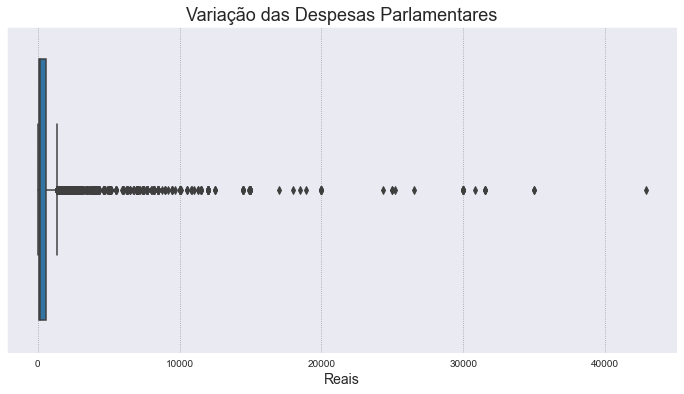

In [30]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.boxplot(x = 'vlrLiquido', data = dados_mt, orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Variação das Despesas Parlamentares', fontsize=18)
ax.set_xlabel('Reais', fontsize=14)
ax
print()

# Análise Exploratória para Resolução das Questões Predefinidas:

## 1 - Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?

><b>Obs:</b> Utilizado como referência a coluna 'vlrLiquido' conforme discrimina o Dicionário de Dados: 
     <p>O seu conteúdo representa o valor líquido do documento fiscal ou do documento que deu causa à despesa
     e será calculado pela diferença entre o Valor do Documento e o Valor da Glosa. <p>É este valor que será 
     debitado da cota do deputado. Caso o débito seja do Tipo Telefonia e o valor seja igual a zero, significa
     que a despesa foi franqueada.

## 1.1 - Obtendo as despesas no período de 2019 a 2021

Aqui a opção foi usar o método dt.to_period('M') para agrupar os períodos por mês para facilitar a visualização

In [31]:
despesas_por_mes = dados_mt.groupby(dados_mt['datEmissao'].dt.to_period('M'))['vlrLiquido'].sum().reset_index()

despesas_por_mes

,datEmissao,vlrLiquido
0,2019-01,171453.84
1,2019-02,168611.04
2,2019-03,171501.98
3,2019-04,219030.74
4,2019-05,224771.71
5,2019-06,281671.03
6,2019-07,259202.83
7,2019-08,292714.45
8,2019-09,307211.49
9,2019-10,283485.68


Para criação do gráfico com as datas, precisamos converter a coluna 'datEmissao' do tipo datetime para o tipo string:

In [32]:
despesas_por_mes['datEmissao'] = despesas_por_mes['datEmissao'].astype(str)

## 1.2 - Representação gráfica das despesas ao longo do período:

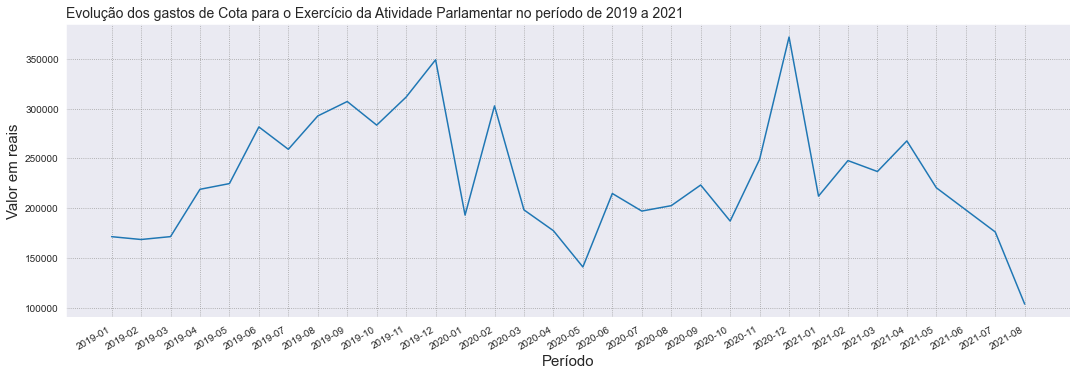

In [33]:
eixo_data = despesas_por_mes['datEmissao']

eixo_valores = despesas_por_mes['vlrLiquido'] 

fig, ax = plt.subplots(figsize=(18, 6))

# Adiconando títulos
plt.title("Evolução dos gastos de Cota para o Exercício da Atividade Parlamentar no período de 2019 a 2021 ", loc='left', fontsize=14, fontweight=0)
plt.xlabel("Período", fontsize=15)
plt.ylabel("Valor em reais", fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# rotacionar das datas
fig.autofmt_xdate()

plt.plot(eixo_data, eixo_valores)
print()

## 2 - Qual a média de gastos por parlamentar?

In [34]:
dados_mt.txNomeParlamentar.value_counts()

José Medeiros               1544
Professora Rosa Neide       1485
Dr. Leonardo                1274
Emanuel Pinheiro Neto       1235
Neri Geller                 1060
Juarez Costa                1021
Nelson Barbudo               529
Valtenir Pereira             379
Carlos Bezerra               315
SÁGUAS MORAES                 34
FABIO GARCIA                  32
NILSON LEITÃO                 27
ADILTON SACHETTI              12
PROFESSOR VICTÓRIO GALLI      10
EZEQUIEL FONSECA               3
Name: txNomeParlamentar, dtype: int64

In [35]:
a = dados_mt[['txNomeParlamentar', 'sgPartido','vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).mean().sort_values('vlrLiquido',ascending=False).round(2)

a.rename(columns={'vlrLiquido':'Média Despesas'}, inplace=True)

a = a.reset_index()

a

,txNomeParlamentar,sgPartido,Média Despesas
0,PROFESSOR VICTÓRIO GALLI,PSL,3386.81
1,Carlos Bezerra,MDB,2874.37
2,ADILTON SACHETTI,PRB,2411.31
3,Nelson Barbudo,PSL,1534.54
4,NILSON LEITÃO,PSDB,1314.71
5,Neri Geller,PP,911.06
6,Juarez Costa,MDB,850.89
7,Dr. Leonardo,SOLIDARIEDADE,767.35
8,Emanuel Pinheiro Neto,PTB,657.35
9,Professora Rosa Neide,PT,570.00


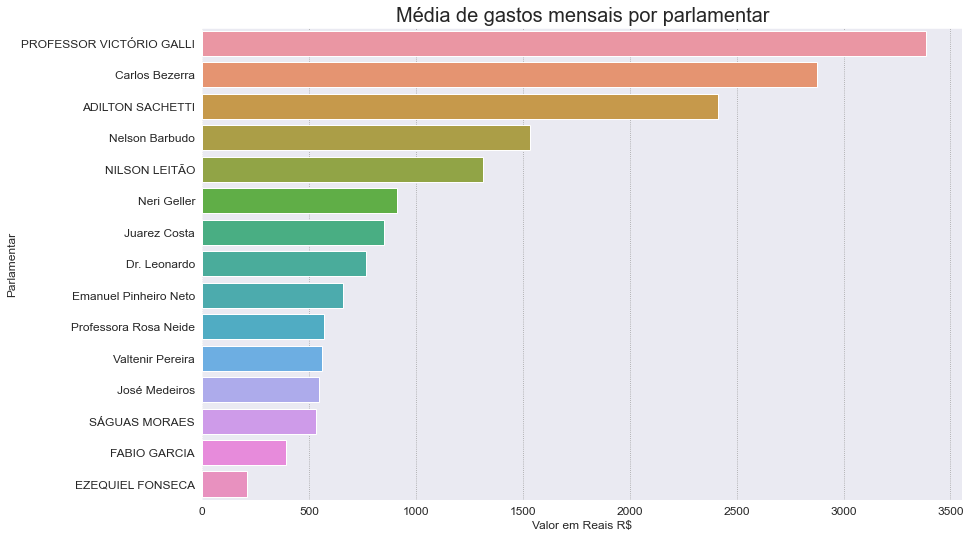

In [36]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Média de gastos mensais por parlamentar', fontsize=20)

sns.set(font_scale=2)
sns.barplot(x="Média Despesas", y="txNomeParlamentar",data=a.sort_values(by='Média Despesas', ascending=False)[:15]);
plt.ylabel('Parlamentar', fontsize=12)
plt.xlabel('Valor em Reais R$', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()

## 3 - Quais foram os parlamentares que mais e que menos consumiram recursos?

In [37]:
desp_maxima_parlamentar = dados_mt[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).sum().sort_values('vlrLiquido',ascending=False).round(2).reset_index()

desp_maxima_parlamentar.rename(columns={'vlrLiquido':'Despesas Máximas R$'}, inplace=True)

desp_maxima_parlamentar = desp_maxima_parlamentar.head()

desp_maxima_parlamentar.style.format({'Despesas Máximas R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,txNomeParlamentar,sgPartido,Despesas Máximas R$
0,Dr. Leonardo,SOLIDARIEDADE,R$ 977604.64
1,Neri Geller,PP,R$ 965718.93
2,Carlos Bezerra,MDB,R$ 905426.94
3,Juarez Costa,MDB,R$ 868756.69
4,Professora Rosa Neide,PT,R$ 846443.95


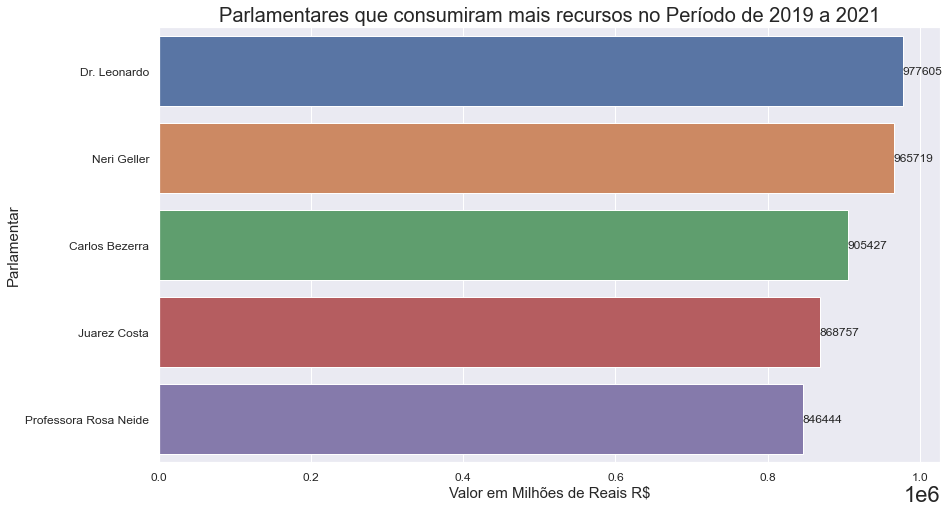

In [38]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Parlamentares que consumiram mais recursos no Período de 2019 a 2021', fontsize=20)

grafico = sns.barplot(y = 'txNomeParlamentar', x = 'Despesas Máximas R$', data = desp_maxima_parlamentar[:10])
grafico.bar_label(grafico.containers[0], fontsize=12)
plt.ylabel('Parlamentar', fontsize=15)
plt.xlabel('Valor em Milhões de Reais R$', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
print()

In [39]:
desp_minima_parlamentar = dados_mt[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).sum().sort_values('vlrLiquido',ascending=True).round(2).reset_index()

desp_minima_parlamentar.rename(columns={'vlrLiquido':'Despesa Mínima R$'}, inplace=True)

desp_minima_parlamentar = desp_minima_parlamentar.head()

desp_minima_parlamentar.style.format({'Despesa Mínima R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,txNomeParlamentar,sgPartido,Despesa Mínima R$
0,EZEQUIEL FONSECA,PP,R$ 633.30
1,FABIO GARCIA,DEM,R$ 12594.31
2,SÁGUAS MORAES,PT,R$ 18125.94
3,ADILTON SACHETTI,PRB,R$ 28935.71
4,PROFESSOR VICTÓRIO GALLI,PSL,R$ 33868.12


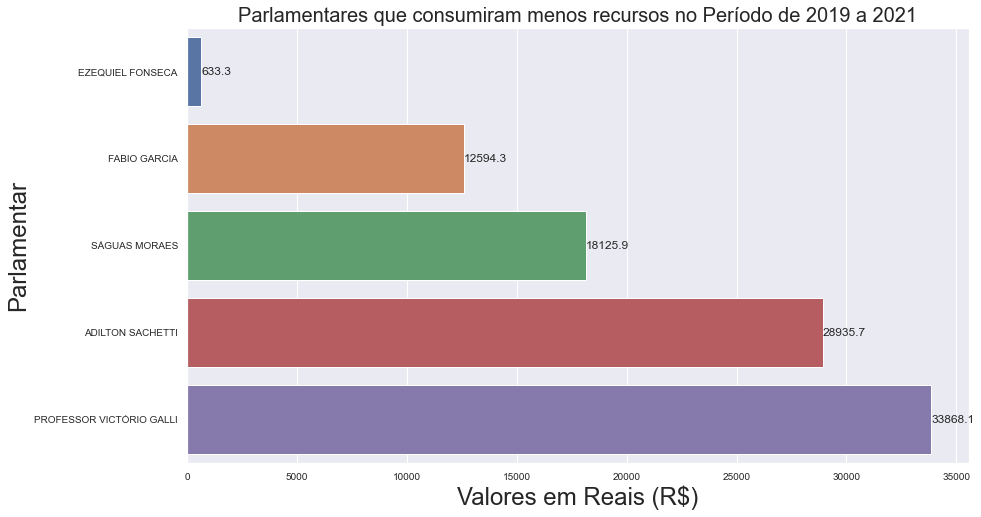

In [40]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Parlamentares que consumiram menos recursos no Período de 2019 a 2021', fontsize=20)

grafico = sns.barplot(y = 'txNomeParlamentar', x = 'Despesa Mínima R$', data = desp_minima_parlamentar[-10:])
grafico.bar_label(grafico.containers[0], fontsize=12)
plt.ylabel('Parlamentar')
plt.xlabel('Valores em Reais (R$)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
print()

## 4 - Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?

In [41]:
categorias_onerosas = dados_mt[['txtDescricao', 'vlrLiquido']].groupby('txtDescricao').sum().sort_values('vlrLiquido', ascending=False)

categorias_onerosas.rename(columns={'vlrLiquido':'Valor Gasto na Categoria'}, inplace=True)

categorias_onerosas = categorias_onerosas.reset_index() # Reset Index caso deseje gerar gráfico (ele reposiciona as colunas)

categorias_onerosas.style.format({'Valor Gasto na Categoria':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,txtDescricao,Valor Gasto na Categoria
0,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,R$ 2294108.21
1,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,R$ 1312773.73
2,PASSAGEM AÉREA - RPA,R$ 1098022.94
3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,R$ 778369.94
4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",R$ 645020.00
5,COMBUSTÍVEIS E LUBRIFICANTES.,R$ 518746.09
6,PASSAGEM AÉREA - REEMBOLSO,R$ 327825.99
7,TELEFONIA,R$ 156199.67
8,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.",R$ 102530.91
9,SERVIÇOS POSTAIS,R$ 51731.64


## 4.1 - Plotando um gráfico com as categorias mais onerosas:

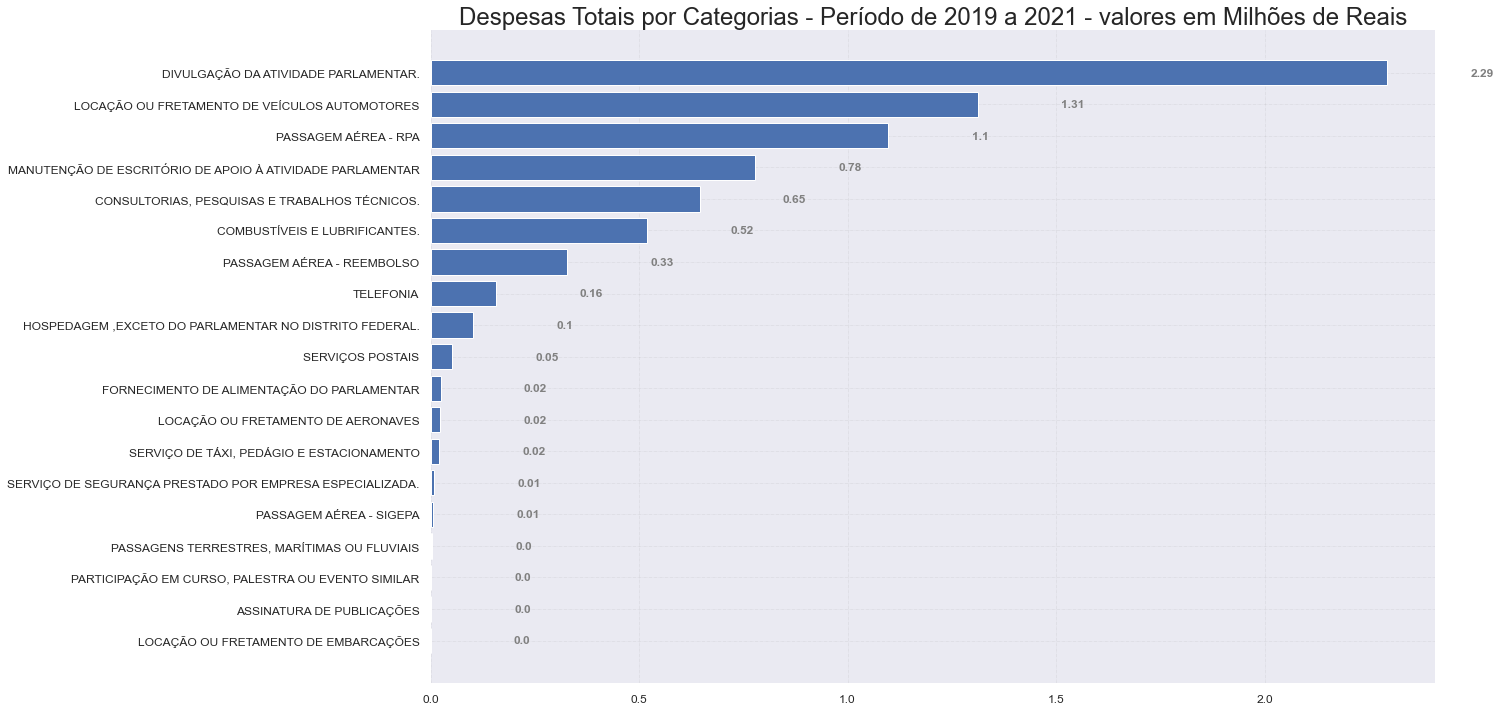

In [42]:
# Determinando a categoria e valores:
x = categorias_onerosas.txtDescricao
y = categorias_onerosas['Valor Gasto na Categoria']/1000000

# Ajustando o tamanho da Área do Gráfico:
fig, ax = plt.subplots(figsize=(18, 12))
  
# Gerando o BarPlot Horizontal:
ax.barh(x, y)
  
# Removendo as linhas de limites do gráfico:
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
# Removendo as marcações dos eixos x e y:
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Adicionando preenchimento entre eixos e rótulos:
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)
  
# Adicionando as marcações do grid em x e y:
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Mostrando os valores maiores no alto do gráfico:
ax.invert_yaxis()
  
# Adicionando Rótulos nas Barras do Gráfico
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=12, fontweight='bold',
             color='grey')
  
# Adicionando um Título ao Gráfico:
ax.set_title('Despesas Totais por Categorias - Período de 2019 a 2021 - valores em Milhões de Reais',
             loc='center', )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
  
# # Adicionando uma Marca d'água no Gráfico
# fig.text(0.9, 0.15, 'Márcio Estevam da Silva', fontsize=12,
#          color='grey', ha='right', va='bottom',
#          alpha=0.7)
  
# Mostra o gráfico:
plt.show()

## 5 - Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?

In [43]:
trecho_viagem = dados_mt['txtTrecho'].dropna().value_counts()

trecho_viagem = trecho_viagem.reset_index()

trecho_viagem.rename(columns={'index':'Origem / Destino', 'txtTrecho':'Qtde de Viagens'}, inplace=True)

trecho_viagem = trecho_viagem.head(20)

trecho_viagem

,Origem / Destino,Qtde de Viagens
0,BSB/CGB,578
1,CGB/BSB,571
2,OPS/CGB,41
3,CGB/BSB/CGB,37
4,OPS/BSB,26
5,BSB/OPS,25
6,CGB/OPS,25
7,BSB/CGB/BSB,19
8,CGH/BSB,12
9,CGB/SMT,11


In [44]:
aeroportos = { 'Siglas':['BSB', 'CGB', 'OPS', 'SMT', 'GRU', 'CGH', 'SXO'],
               'Cidades': ['Brasília', 'Cuiabá', 'Sinop', 'Sorriso', 'Guarulhos', 'São Paulo', 'São Félix do Araguaia'],
               'Estados': ['DF', 'MT', 'MT', 'MT', 'SP', 'SP', 'MT']
             }
aeroportos = pd.DataFrame(aeroportos)

aeroportos

,Siglas,Cidades,Estados
0,BSB,Brasília,DF
1,CGB,Cuiabá,MT
2,OPS,Sinop,MT
3,SMT,Sorriso,MT
4,GRU,Guarulhos,SP
5,CGH,São Paulo,SP
6,SXO,São Félix do Araguaia,MT


In [45]:
trecho_viagem['Origem'] = trecho_viagem['Origem / Destino'].str[0:3]
trecho_viagem['Destino'] = trecho_viagem['Origem / Destino'].str[-3:]

In [46]:
trecho_viagem['Cidade_origem'] = trecho_viagem['Origem'].map(aeroportos.set_index('Siglas')['Cidades'])

In [47]:
trecho_viagem['Cidade_destino'] = trecho_viagem['Destino'].map(aeroportos.set_index('Siglas')['Cidades'])

In [48]:
#trecho_viagem.to_csv('trecho_viagem.csv', index=False)

trecho_viagem

,Origem / Destino,Qtde de Viagens,Origem,Destino,Cidade_origem,Cidade_destino
0,BSB/CGB,578,BSB,CGB,Brasília,Cuiabá
1,CGB/BSB,571,CGB,BSB,Cuiabá,Brasília
2,OPS/CGB,41,OPS,CGB,Sinop,Cuiabá
3,CGB/BSB/CGB,37,CGB,CGB,Cuiabá,Cuiabá
4,OPS/BSB,26,OPS,BSB,Sinop,Brasília
5,BSB/OPS,25,BSB,OPS,Brasília,Sinop
6,CGB/OPS,25,CGB,OPS,Cuiabá,Sinop
7,BSB/CGB/BSB,19,BSB,BSB,Brasília,Brasília
8,CGH/BSB,12,CGH,BSB,São Paulo,Brasília
9,CGB/SMT,11,CGB,SMT,Cuiabá,Sorriso


## 5.1 - Plotando um gráfico com os trechos mais recorrentes:

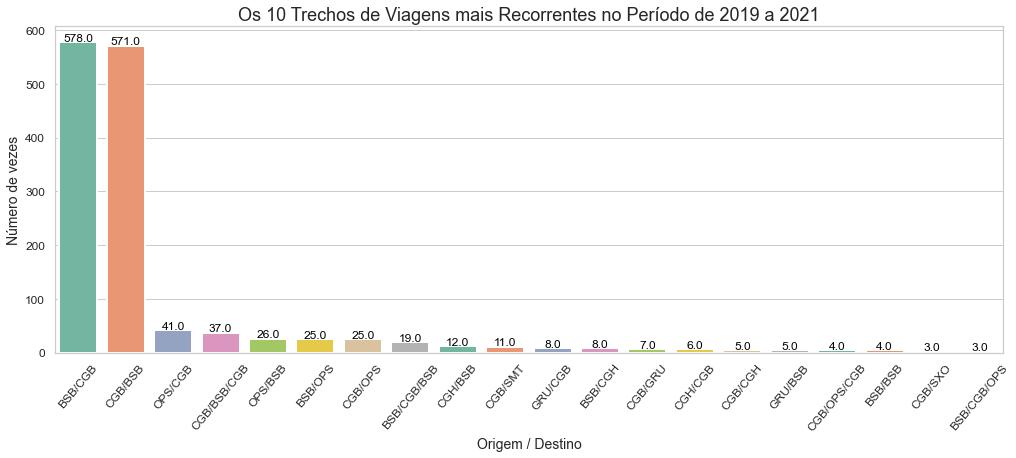

In [49]:
plt.figure(figsize =(17, 6))

sns.set_style("whitegrid")

ax = sns.barplot( x = trecho_viagem['Origem / Destino'], y = trecho_viagem['Qtde de Viagens'],data = trecho_viagem,
                  linewidth=2, palette = "Set2", ci=None)

for i in ax.patches:
    ax.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)

# Adicionando Título ao gráfico
plt.title("Os 10 Trechos de Viagens mais Recorrentes no Período de 2019 a 2021", loc="center", fontsize=18)
plt.xlabel("Origem / Destino", fontsize=14)
plt.ylabel("Número de vezes", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## 6 - Qual a média de gastos por partido?

In [50]:
gasto_partidos = dados_mt[['sgPartido', 'vlrLiquido']].groupby(['sgPartido']).mean()

gasto_partidos_media = gasto_partidos.groupby(['sgPartido']).mean().reset_index().round(2)

gasto_partidos_media = gasto_partidos_media.sort_values(by='vlrLiquido',ascending=False)

#gasto_partidos_media.to_csv('gasto_partidos.csv', index=False)

gasto_partidos_media.style.format({'vlrLiquido':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,sgPartido,vlrLiquido
4,PRB,R$ 2411.31
6,PSL,R$ 1568.91
5,PSDB,R$ 1314.71
1,MDB,R$ 1158.63
3,PP,R$ 909.08
9,SOLIDARIEDADE,R$ 767.35
8,PTB,R$ 657.35
7,PT,R$ 569.17
2,PODE,R$ 544.61
0,DEM,R$ 393.57


In [51]:
g_p = dados_mt[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).sum().sort_values('vlrLiquido',ascending=False).round(2).reset_index()

g_p

,txNomeParlamentar,sgPartido,vlrLiquido
0,Dr. Leonardo,SOLIDARIEDADE,977604.64
1,Neri Geller,PP,965718.93
2,Carlos Bezerra,MDB,905426.94
3,Juarez Costa,MDB,868756.69
4,Professora Rosa Neide,PT,846443.95
5,José Medeiros,PODE,840874.93
6,Emanuel Pinheiro Neto,PTB,811826.57
7,Nelson Barbudo,PSL,811773.26
8,Valtenir Pereira,MDB,212858.27
9,NILSON LEITÃO,PSDB,35497.06


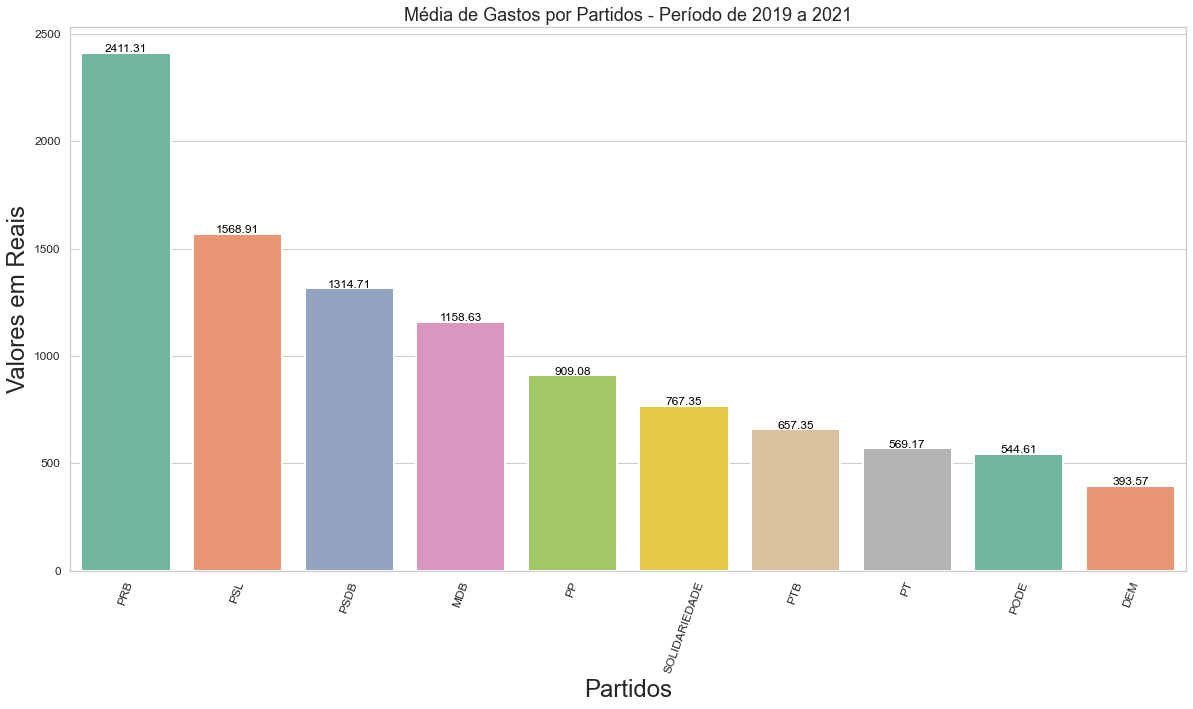

In [52]:
plt.figure(figsize =(20, 10))

sns.set_style("whitegrid")

ax = sns.barplot( x = gasto_partidos_media['sgPartido'], y = (gasto_partidos_media['vlrLiquido']),data = gasto_partidos_media,
                  linewidth=2, palette = "Set2", ci=None)

for i in ax.patches:
    ax.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

# Adicionando Título ao gráfico
plt.title("Média de Gastos por Partidos - Período de 2019 a 2021", loc="center", fontsize=18)
plt.xlabel("Partidos")
plt.ylabel("Valores em Reais")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## 7 - Quais são os partidos que mais e que menos consumiram a cota parlamentar?

A Cota para o Exercício da Atividade Parlamentar (CEAP), instituída pelo Ato da Mesa 43/2009, unificou a verba indenizatória (que vigorava desde 2001), a cota de passagens aéreas e a cota postal-telefônica. O valor mensal do benefício deve ser utilizado pelo deputado para custear despesas típicas do exercício do mandato parlamentar, como aluguel de escritório de apoio ao mandato no estado, passagens aéreas, alimentação, aluguel de carro, combustível, entre outras.
<br>Segue tabela demonstrativa da Cota Parlamentar vigente:

<p align="center"><img src="https://static.wixstatic.com/media/fa559d_3b5f6de0221e463db8c19a7d276b64ac~mv2.jpg/v1/fill/w_450,h_300,al_c,q_80,usm_0.66_1.00_0.01/cota%20parlamentar.webp"></p>

<b>OBSERVAÇÃO:</b> O Estado do Mato Grosso possui limite mensal de <b>R$ 39.428,03</b> por deputado federal. 

Primeiramente para ter uma ideia geral das despesas por partidos no período de 2019 a 2021, separamos as colunas 'sgPartido' e 'vlrLiquido' do DataFrame 'dados_mt' e agrupamos a visualização através da coluna 'sgPartido'e exibimos os 10 primeiros resultados ordenados pelo valor em 'vlrLiquido'.

### Partidos que mais utilizaram a cota parlamentar:

In [53]:
gasto_partidos = dados_mt[['sgPartido', 'sgUF','vlrLiquido']].groupby(['sgPartido']).sum().sort_values('vlrLiquido', ascending = False)

gasto_partidos = gasto_partidos.reset_index()

gasto_partidos_tabela = gasto_partidos.head(5)

gasto_partidos_tabela.style.format({'vlrLiquido':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,sgPartido,vlrLiquido
0,MDB,R$ 1987041.90
1,SOLIDARIEDADE,R$ 977604.64
2,PP,R$ 966352.23
3,PT,R$ 864569.89
4,PSL,R$ 845641.38


### Partidos que menos utilizaram a cota parlamentar:

In [54]:
gasto_partidos = dados_mt[['sgPartido', 'sgUF','vlrLiquido']].groupby(['sgPartido']).sum().sort_values('vlrLiquido', ascending = True)

gasto_partidos = gasto_partidos.reset_index()

gasto_partidos_tabela = gasto_partidos.head(5)

gasto_partidos_tabela.style.format({'vlrLiquido':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,sgPartido,vlrLiquido
0,DEM,R$ 12594.31
1,PRB,R$ 28935.71
2,PSDB,R$ 35497.06
3,PTB,R$ 811826.57
4,PODE,R$ 840874.93


Atribuímos o valor da cota referente ao Estado do Mato Grosso:

In [55]:
cota_mt = 39428.03

In [56]:
aux_parlamentares = dados_mt[['txNomeParlamentar', 'sgPartido']].drop_duplicates()

parlamentares_partido_mt = aux_parlamentares['sgPartido'].value_counts().to_frame()

parlamentares_partido_mt

total_cota_partido = parlamentares_partido_mt.rename(columns={'sgPartido':'Qtde_parlamentares'})

total_cota_partido['cota_mensal'] = total_cota_partido['Qtde_parlamentares'] * cota_mt

total_cota_partido.style.format({'cota_mensal':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,Qtde_parlamentares,cota_mensal
MDB,3,R$ 118284.09
PP,2,R$ 78856.06
PSL,2,R$ 78856.06
PT,2,R$ 78856.06
PSDB,1,R$ 39428.03
PRB,1,R$ 39428.03
DEM,1,R$ 39428.03
PTB,1,R$ 39428.03
SOLIDARIEDADE,1,R$ 39428.03
PODE,1,R$ 39428.03


In [57]:
total_cota_partido["cota_disponibilizada_periodo"] = (cota_mt * 31) * total_cota_partido['Qtde_parlamentares']

total_cota_partido = total_cota_partido.reset_index().rename(columns={'index':'sgPartido'})

total_cota_partido

,sgPartido,Qtde_parlamentares,cota_mensal,cota_disponibilizada_periodo
0,MDB,3,118284.09,3666806.79
1,PP,2,78856.06,2444537.86
2,PSL,2,78856.06,2444537.86
3,PT,2,78856.06,2444537.86
4,PSDB,1,39428.03,1222268.93
5,PRB,1,39428.03,1222268.93
6,DEM,1,39428.03,1222268.93
7,PTB,1,39428.03,1222268.93
8,SOLIDARIEDADE,1,39428.03,1222268.93
9,PODE,1,39428.03,1222268.93


In [58]:
gasto_total_partidos = gasto_partidos.groupby('sgPartido').sum().reset_index()

gasto_total_partidos

,sgPartido,vlrLiquido
0,DEM,12594.31
1,MDB,1987041.90
2,PODE,840874.93
3,PP,966352.23
4,PRB,28935.71
5,PSDB,35497.06
6,PSL,845641.38
7,PT,864569.89
8,PTB,811826.57
9,SOLIDARIEDADE,977604.64


In [59]:
uso_da_cota = pd.merge(total_cota_partido, gasto_total_partidos, on=['sgPartido'])

uso_da_cota['Percentual Utilizado (%)'] = (uso_da_cota['vlrLiquido'] / uso_da_cota['cota_disponibilizada_periodo'])*100

uso_da_cota = uso_da_cota.sort_values(by='Percentual Utilizado (%)', ascending=False)

uso_da_cota = pd.DataFrame(uso_da_cota)

#uso_da_cota.to_csv('uso_da_cota.csv', index=False)

uso_da_cota

,sgPartido,Qtde_parlamentares,cota_mensal,cota_disponibilizada_periodo,vlrLiquido,Percentual Utilizado (%)
8,SOLIDARIEDADE,1,39428.03,1222268.93,977604.64,79.982778
9,PODE,1,39428.03,1222268.93,840874.93,68.796229
7,PTB,1,39428.03,1222268.93,811826.57,66.419636
0,MDB,3,118284.09,3666806.79,1987041.90,54.189981
1,PP,2,78856.06,2444537.86,966352.23,39.531081
3,PT,2,78856.06,2444537.86,864569.89,35.367417
2,PSL,2,78856.06,2444537.86,845641.38,34.593098
4,PSDB,1,39428.03,1222268.93,35497.06,2.904194
5,PRB,1,39428.03,1222268.93,28935.71,2.367377
6,DEM,1,39428.03,1222268.93,12594.31,1.030404


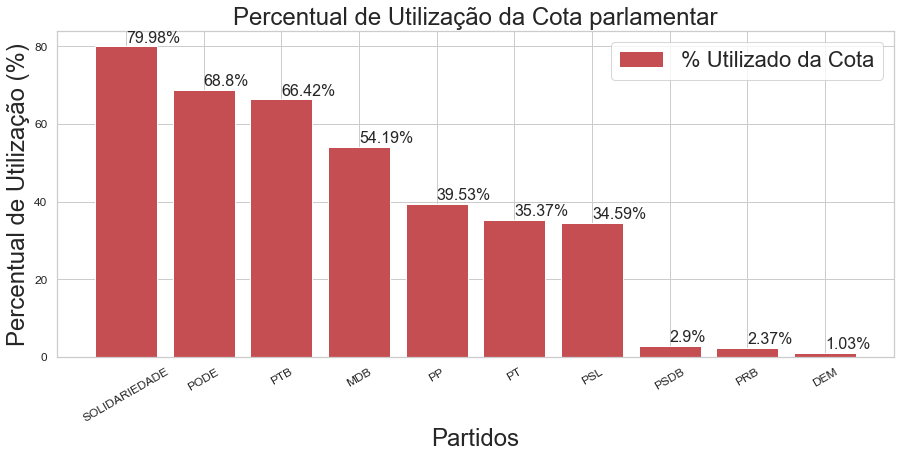

In [60]:
x = uso_da_cota['sgPartido']
y = uso_da_cota['Percentual Utilizado (%)']

plt.figure(figsize=(15,6))

plt.bar(x, y, color='r')

plt.xticks(rotation = 30)
plt.xlabel("Partidos")
plt.ylabel("Percentual de Utilização (%)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["% Utilizado da Cota"])
plt.title("Percentual de Utilização da Cota parlamentar")

for index,data in enumerate(y.round(2)):
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=16))
    
plt.show()

## 8 - Há alguma correlação entre a quantidade de parlamentares por partido e o valor total dos gastos?

Primeiramente fazemos a verificação do gasto total dos partidos no período:

In [61]:
gasto_partidos = dados_mt[['sgPartido', 'vlrLiquido']].groupby(['sgPartido']).sum().sort_values('vlrLiquido', ascending = False)

gasto_partidos = gasto_partidos.reset_index()

gasto_partidos = gasto_partidos.rename(columns={'vlrLiquido':'Total_gastos'})

gasto_partidos.style.format({'Total_gastos':'R$ {:.2F}'})

,sgPartido,Total_gastos
0,MDB,R$ 1987041.90
1,SOLIDARIEDADE,R$ 977604.64
2,PP,R$ 966352.23
3,PT,R$ 864569.89
4,PSL,R$ 845641.38
5,PODE,R$ 840874.93
6,PTB,R$ 811826.57
7,PSDB,R$ 35497.06
8,PRB,R$ 28935.71
9,DEM,R$ 12594.31


Em seguida checamos a quantidade de parlamentares por partido nesse período:

In [62]:
aux_partido = dados_mt[['sgPartido', 'txNomeParlamentar']].drop_duplicates()

parlamentares_partido = aux_partido.groupby('sgPartido').count().sort_values(by='txNomeParlamentar', ascending=False).reset_index()

parlamentares_partido = parlamentares_partido.rename(columns={'txNomeParlamentar':'Qtde_parlamentares'})

parlamentares_partido

,sgPartido,Qtde_parlamentares
0,MDB,3
1,PP,2
2,PSL,2
3,PT,2
4,DEM,1
5,PODE,1
6,PRB,1
7,PSDB,1
8,PTB,1
9,SOLIDARIEDADE,1


Fizemos então a junção (Pandas merge) entre a tabela de "gasto_partidos" e a tabela "parlamentares_partido", onde a coluna de união será a "sgPartido":

In [63]:
parlamentares_despesas = pd.merge(gasto_partidos, parlamentares_partido, on=['sgPartido'])

parlamentares_despesas = parlamentares_despesas.sort_values(by='Qtde_parlamentares', ascending=False)

parlamentares_despesas.to_csv('gasto_qtde_parlamentares.csv', index=False)

parlamentares_despesas

,sgPartido,Total_gastos,Qtde_parlamentares
0,MDB,1987041.90,3
2,PP,966352.23,2
3,PT,864569.89,2
4,PSL,845641.38,2
1,SOLIDARIEDADE,977604.64,1
5,PODE,840874.93,1
6,PTB,811826.57,1
7,PSDB,35497.06,1
8,PRB,28935.71,1
9,DEM,12594.31,1


Como se tratam de grandezas em escalas diferentes (Total_gastos x Qtde_parlamentares), os dados precisam ser Normalizados (ajustados em uma escala comum), para isso utilizamos o método <b>MinMaxScaler</b> presente na biblioteca Sklearn. 

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler_01 = MinMaxScaler() 

partido_despesa_normalizado = scaler_01.fit_transform(parlamentares_despesas[['Total_gastos', 'Qtde_parlamentares']])

Após a normalização convertemos os dados gerados em dataframe, renomeando as colunas com os nomes originais:

In [65]:
df_partido_despesa_normalizado = pd.DataFrame(partido_despesa_normalizado)

df_partido_despesa_normalizado.rename(columns={0:'Total_gastos', 1:'Qtde_parlamentares_partido'}, inplace=True)

df_partido_despesa_normalizado.to_csv('gasto_parlamentar_normalizado.csv', index=False)

df_partido_despesa_normalizado['sgPartido'] = parlamentares_despesas['sgPartido']

#df_partido_despesa_normalizado.to_csv('gasto_partido_qtde_normalizado.csv', index=False)

df_partido_despesa_normalizado

,Total_gastos,Qtde_parlamentares_partido,sgPartido
0,1.000000,1.0,MDB
1,0.483051,0.5,SOLIDARIEDADE
2,0.431501,0.5,PP
3,0.421914,0.5,PT
4,0.488750,0.0,PSL
5,0.419500,0.0,PODE
6,0.404788,0.0,PTB
7,0.011600,0.0,PSDB
8,0.008276,0.0,PRB
9,0.000000,0.0,DEM


Com os dados agora normalizados, aplicamos a função de correlação:

In [66]:
correlacao = df_partido_despesa_normalizado.corr()

correlacao

,Total_gastos,Qtde_parlamentares_partido
Total_gastos,1.00000,0.77706
Qtde_parlamentares_partido,0.77706,1.00000


><b>OBSERVAÇÃO:</b> Nota-se uma forte correlação positiva entre o Total de gastos com a Quantidade de Parlamentares.

Em seguida plotamos o gráfico de Mapa de Calor, recomendado para exibição da correlação, onde as cores mais intensas confirmam a alta correlação entre as variáveis comparadas.
<br><b>NOTA:</b> Foi ajustada a escala da correlação conforme preconiza a Estatística Probabilística, com a escala variando de -1 a 1.

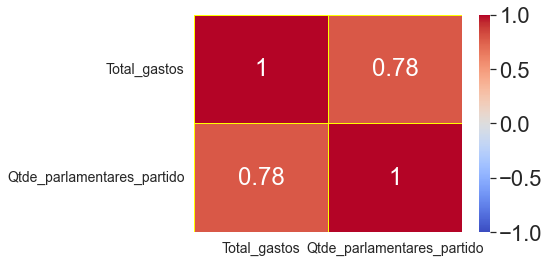

In [67]:
a = sns.heatmap(data = correlacao,
            vmin= -1, vmax=1,
            cmap='coolwarm', center=0, annot=True,
            linewidths=1, linecolor="yellow")

a.set_xticklabels(a.get_xmajorticklabels(), fontsize = 14, rotation = 0)
a.set_yticklabels(a.get_ymajorticklabels(), fontsize = 14)
print()

E finalizamos a avaliação com mais uma representação gráfica, desta vez a dispersão dos valores normalizados, com destaque para a linha de tendência no centro do gráfico.

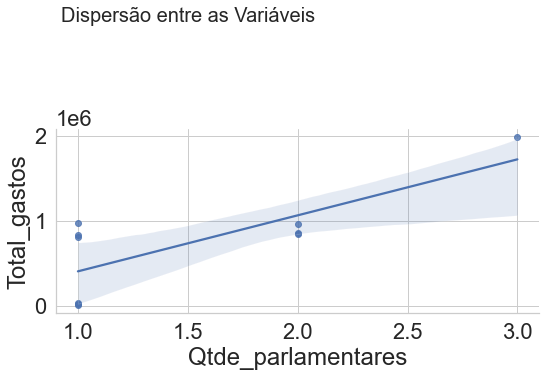

In [68]:
ax = sns.pairplot(parlamentares_despesas, y_vars='Total_gastos', x_vars=['Qtde_parlamentares'], kind='reg')

ax.figure.set_size_inches(12,6)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)

print()

<h2>Equipe de Projeto</h2>

<h3>Para acessar o perfil no GitHub de membro da equipe clique na foto e você será redirecionado.</h3>
<table align="center">
    <tr align="center">        
    <td><a href="https://github.com/leticiafelippe"><img src="https://static.wixstatic.com/media/fa559d_7cd4e0d00dc6431e937b93efc00949c9~mv2.jpg/v1/fill/w_189,h_192,al_c,q_80,usm_0.66_1.00_0.01/LETICIA.webp"</a></td>
    <td><a href="https://github.com/Mestevam1976" target="_blank"><img src="https://static.wixstatic.com/media/fa559d_fa2cf4ccc63e4aa6b4139bd9fd83a54c~mv2.jpg/v1/crop/x_74,y_0,w_550,h_595/fill/w_189,h_192,al_c,q_80,usm_0.66_1.00_0.01/marcio.webp"></a></td>
    <td><a href="https://github.com/PHSFernandes"><img src="https://static.wixstatic.com/media/fa559d_32b5fb5b548d47abbbee5f77f35121c9~mv2.jpg/v1/fill/w_189,h_192,al_c,q_80,usm_0.66_1.00_0.01/PH.webp"</a></td>
    <td><a href="https://github.com/Reinaldos"><img src="https://static.wixstatic.com/media/fa559d_6a3934268c4d46d3901ed0e0324b45f0~mv2.jpg/v1/fill/w_189,h_192,al_c,q_80,usm_0.66_1.00_0.01/REINALDO.webp"</a></td>        
    </tr>    
    <tr align="center">
        <td><p align="center"><b>LETÍCIA FELIPPE</b></p></td>
        <td><p align="center"><b>MÁRCIO ESTEVAM DA SILVA</b></p></td>
        <td><p align="center"><b>PAULO H. S. FERNANDES</b></p></td>
        <td><p align="center"><b>REINALDO LEANDRO DE SOUSA</b></p></td>
                
</table>

In [69]:
#pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
